In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [32]:
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [33]:
data = pd.read_csv("final_data.csv")
data.head()

,Pathway(ConsensusPathDB):IS,Function_description:IS,Interactions(ConsensusPathDB):IS,RVIS_percentile_EVS:IS,HIPred_Y:IS,ExAC_cnv_flag_N:IS,ExAC_cnv_flag_Y:IS,Gene damage prediction (all disease-causing genes)_High:IS,Gene damage prediction (all Mendelian disease-causing genes)_High:IS,Gene damage prediction (all Mendelian disease-causing genes)_Low:IS,clinSign
0,1,1,0.120411,-0.406600,1,1,0,0,0,0,1
1,1,1,0.004651,-0.725675,1,1,0,0,0,0,1
2,1,1,0.004651,-0.725675,1,1,0,0,0,0,1
3,1,1,0.003168,0.053669,1,1,0,0,0,0,1
4,0,1,0.000150,-0.642293,1,1,0,0,0,0,1


In [35]:
input_columns = data.columns[0:10]
output_column = data.columns[-1]

In [36]:

def toarray(row):
    return [row[i] for i in input_columns]

temp = data.apply(toarray,axis=1)
data = pd.DataFrame(list(zip(temp,data[output_column])),columns=("input","output"))

x = np.array(data['input'].tolist())
y = np.array(data['output'].tolist())

data.head()


,input,output
0,"[1.0, 1.0, 0.120410661, -0.40659957, 1.0, 1.0,...",1
1,"[1.0, 1.0, 0.00465053, -0.725674551, 1.0, 1.0,...",1
2,"[1.0, 1.0, 0.00465053, -0.725674551, 1.0, 1.0,...",1
3,"[1.0, 1.0, 0.003168344, 0.053668869, 1.0, 1.0,...",1
4,"[0.0, 1.0, 0.000149578, -0.642292587, 1.0, 1.0...",1


In [37]:
mms = MinMaxScaler()
test = x.copy()
x = mms.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)
x_train

array([[1.00000000e+00, 1.00000000e+00, 1.41985011e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 8.76107672e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 1.27383217e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.00000000e+00, 3.06331614e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [38]:
# Compile the model
model = tf.keras.Sequential([
    Dense(16, input_dim=10, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss=BinaryCrossentropy(), optimizer="adam", metrics=[BinaryAccuracy()])

In [39]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20


155/155 [==============================] - 1s 2ms/step - loss: 0.6101 - binary_accuracy: 0.6915 - val_loss: 0.5852 - val_binary_accuracy: 0.7106
Epoch 2/20
155/155 [==============================] - 0s 1ms/step - loss: 0.5843 - binary_accuracy: 0.6980 - val_loss: 0.5636 - val_binary_accuracy: 0.7149
Epoch 3/20
155/155 [==============================] - 0s 1ms/step - loss: 0.5682 - binary_accuracy: 0.7110 - val_loss: 0.5571 - val_binary_accuracy: 0.7313
Epoch 4/20
155/155 [==============================] - 0s 1ms/step - loss: 0.5643 - binary_accuracy: 0.7169 - val_loss: 0.5589 - val_binary_accuracy: 0.7131
Epoch 5/20
155/155 [==============================] - 0s 1ms/step - loss: 0.5629 - binary_accuracy: 0.7179 - val_loss: 0.5535 - val_binary_accuracy: 0.7240
Epoch 6/20
155/155 [==============================] - 0s 1ms/step - loss: 0.5594 - binary_accuracy: 0.7215 - val_loss: 0.5521 - val_binary_accuracy: 0.7307
Epoch 7/20
155/155 [==============================] - 0s 994us/step - loss:

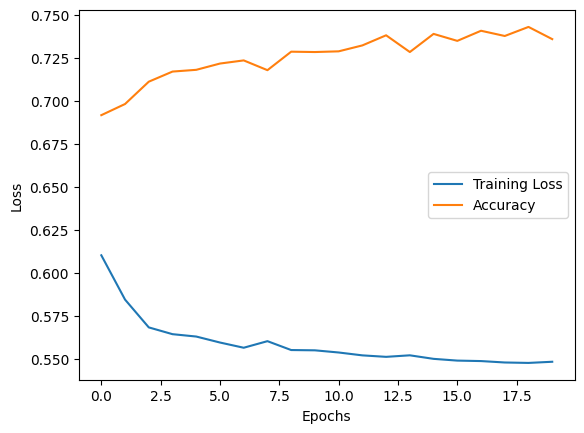

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_test))), y_test)


52/52 [==============================] - 0s 913us/step


0.7349544072948329

In [42]:

accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_train))), y_train)


155/155 [==============================] - 0s 586us/step


0.7324685853263072

# BIAS!!!!

Máme preučený model a nerobí to čo chceme aby robil. To čo robí náš model, je, že predikuje 1 a nejako nerieši čo sa nachádza v dátach:

In [65]:
#Doplnene
data = pd.read_csv("final_data.csv")
ones = (data['clinSign'] == 1).sum()
zeros = (data['clinSign'] == 0).sum()
print('Jednotky:', ones, '\nNuly:', zeros)

Jednotky: 4612 
Nuly: 1967


In [66]:
zeros/(zeros+ones)

0.2989816081471348

In [67]:
ones/(zeros+ones)

0.7010183918528652

In [70]:
zeros_indices = np.where(y_train == 0)[0]
ones_indices = np.where(y_train == 1)[0]

In [103]:
y_train.shape

(4934,)

In [99]:
x_test_zeros = x_test[y_test == 0]
y_test_zeros = y_test[y_test == 0]

x_test_ones = x_test[y_test == 1]
y_test_ones = y_test[y_test == 1]

# Evaluate the model on the subset with zeros
loss_zeros, accuracy_zeros = model.evaluate(x_test_zeros, y_test_zeros)
print(f"Accuracy for test data with zeros: {accuracy_zeros}")

# Evaluate the model on the subset with ones
loss_ones, accuracy_ones = model.evaluate(x_test_ones, y_test_ones)
print(f"Accuracy for test data with ones: {accuracy_ones}")

15/15 [==============================] - 0s 768us/step - loss: 1.2221 - binary_accuracy: 0.1681
Accuracy for test data with zeros: 0.16806723177433014
37/37 [==============================] - 0s 671us/step - loss: 0.2716 - binary_accuracy: 0.9658
Accuracy for test data with ones: 0.9657827019691467


Vyberieme si indexy tak aby sme mali vyvážený trénovací datset čo sa týka atribútu `clinSign`

In [87]:
# Find the smaller count to balance the dataset
n_samples = min(len(zeros_indices), len(ones_indices))

# Randomly select n_samples from each class
np.random.seed(42)  # For reproducibility
selected_zeros_indices = np.random.choice(zeros_indices, n_samples, replace=False)
selected_ones_indices = np.random.choice(ones_indices, n_samples, replace=False)

# Combine and shuffle the indices
balanced_indices = np.concatenate([selected_zeros_indices, selected_ones_indices])
np.random.shuffle(balanced_indices)

# Create balanced training sets
x_train_balanced = x_train[balanced_indices]
y_train_balanced = y_train[balanced_indices]

# Scaling the features
mms = MinMaxScaler()
x_train_balanced = mms.fit_transform(x_train_balanced)
x_test = mms.transform(x_test)

In [95]:
ones = (y_train_balanced == 1).sum()
zeros = (y_train_balanced == 0).sum()
print('Jednotky:', ones, '\nNuly:', zeros)


ones = (y_test == 1).sum()
zeros = (y_test == 0).sum()
print('\nTestovacia množina:\nJednotky:', ones, '\nNuly:', zeros)

Jednotky: 1491 
Nuly: 1491

Testovacia množina:
Jednotky: 1169 
Nuly: 476


Epoch 1/20
94/94 [==============================] - 0s 2ms/step - loss: 0.6941 - binary_accuracy: 0.5184 - val_loss: 0.7074 - val_binary_accuracy: 0.3112
Epoch 2/20
94/94 [==============================] - 0s 1ms/step - loss: 0.6809 - binary_accuracy: 0.5734 - val_loss: 0.6539 - val_binary_accuracy: 0.6377
Epoch 3/20
94/94 [==============================] - 0s 1ms/step - loss: 0.6542 - binary_accuracy: 0.6425 - val_loss: 0.6328 - val_binary_accuracy: 0.6201
Epoch 4/20
94/94 [==============================] - 0s 1ms/step - loss: 0.6432 - binary_accuracy: 0.6368 - val_loss: 0.6833 - val_binary_accuracy: 0.5787
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.6432 - binary_accuracy: 0.6388 - val_loss: 0.6429 - val_binary_accuracy: 0.6176
Epoch 6/20
94/94 [==============================] - 0s 1ms/step - loss: 0.6426 - binary_accuracy: 0.6422 - val_loss: 0.6621 - val_binary_accuracy: 0.6182
Epoch 7/20
94/94 [==============================] - 0s 1ms/step - loss: 0.63

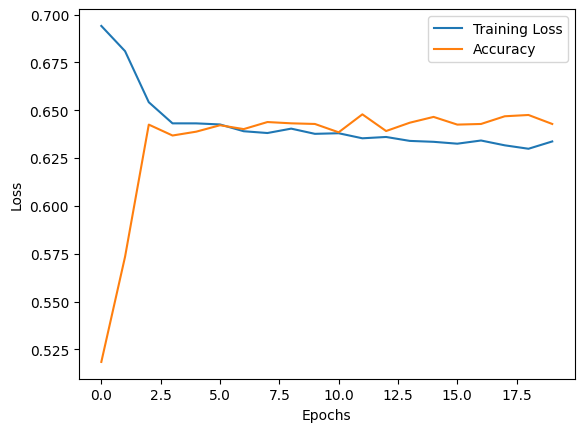

In [89]:
# Compile the model
model_balanced = tf.keras.Sequential([
    Dense(16, input_dim=10, activation='relu'),
    Dense(64, activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_balanced.compile(loss=BinaryCrossentropy(), optimizer="adam", metrics=[BinaryAccuracy()])

history = model_balanced.fit(x_train_balanced, y_train_balanced, epochs=20, batch_size=32, validation_data=(x_test, y_test))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
# Evaluate the model on test data
loss, accuracy = model_balanced.evaluate(x_test, y_test)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

52/52 [==============================] - 0s 807us/step - loss: 0.6153 - binary_accuracy: 0.6480
Test Loss: 0.615252673625946
Test Accuracy: 0.648024320602417


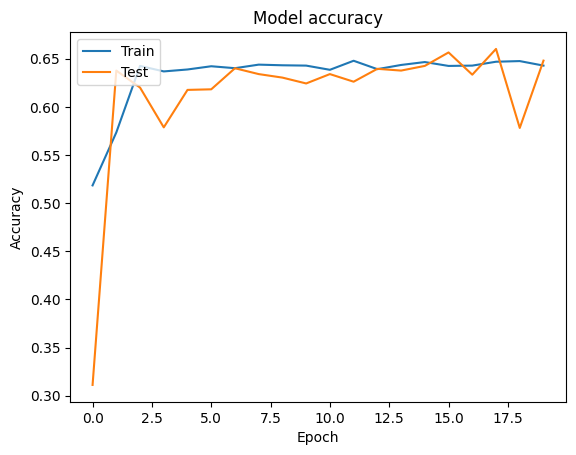

In [97]:

# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [100]:
# Evaluate the model on the subset with zeros
loss_zeros, accuracy_zeros = model_balanced.evaluate(x_test_zeros, y_test_zeros)
print(f"Accuracy for test data with zeros: {accuracy_zeros}")

# Evaluate the model on the subset with ones
loss_ones, accuracy_ones = model_balanced.evaluate(x_test_ones, y_test_ones)
print(f"Accuracy for test data with ones: {accuracy_ones}")


15/15 [==============================] - 0s 730us/step - loss: 0.6831 - binary_accuracy: 0.6134
Accuracy for test data with zeros: 0.6134454011917114
37/37 [==============================] - 0s 608us/step - loss: 0.5876 - binary_accuracy: 0.6621
Accuracy for test data with ones: 0.6621043682098389
